# <span style="color:Maroon">Crab Age Prediction - Random Forest Model

In [1]:
# Import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)

In [2]:
os.getcwd()

'C:\\Users\\sidhu\\Downloads\\CrabAgePrediction\\Codes'

In [3]:
# Read the csv file data
os.chdir('..\\Data\\')
df = pd.read_csv('data_treated.csv')
df.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,1,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,0,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,1,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,0,1,0


In [4]:
df.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
count,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000
mean,1.309256,1.019176,0.347746,23.399535,10.129307,5.106812,6.742628,9.915635,0.314499,0.318111,0.367389
std,0.299227,0.247200,0.095381,13.658174,6.148418,3.066542,3.848888,3.122588,0.464376,0.465803,0.482156
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000,0.000000,0.000000,0.000000
25%,1.125000,0.875000,0.287500,12.647421,5.326162,2.650678,3.699610,8.000000,0.000000,0.000000,0.000000
50%,1.362500,1.062500,0.350000,22.743386,9.518345,4.847764,6.662132,10.000000,0.000000,0.000000,0.000000
75%,1.537500,1.200000,0.412500,32.644449,14.188925,7.172423,9.273830,11.000000,1.000000,1.000000,1.000000
max,2.000000,1.575000,0.625000,72.432972,34.926584,16.726205,20.581737,20.000000,1.000000,1.000000,1.000000


## <span style="color:Maroon">Part 3: Predictive Model

#### <span style="color:Maroon">Performance Metrics:
<span style="color:Green">To pick the final model, we shall look at three performance metrics:


<span style="color:Green">__Mean Absolute Error:__ The mean_absolute_error function computes mean absolute error, a risk metric corresponding to the expected value of the absolute error loss or -norm loss. For more details, please refer the below link: https://scikit-learn.org/stable/modules/model_evaluation.html#mean-absolute-error
    
        
<span style="color:Green">__Mean Squared Error:__ The mean_squared_error function computes mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss. For more details, please refer the below link: https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error

<span style="color:Green">__Rsquare:__ The r2_score function computes the coefficient of determination, usually denoted as R². It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance. As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0. For more details, please refer the below link: https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score

## <span style="color:Maroon">Model 2: Random Forest model
    
<span style="color:Green">Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.

<span style="color:Green">Hyper-parameters to be tuned in Random Forest model are:
    1. n_estimators = number of trees in the foreset
    2. max_features = max number of features considered for splitting a node
    3. max_depth = max number of levels in each decision tree
    4. min_samples_split = min number of data points placed in a node before the node is split
    5. min_samples_leaf = min number of data points allowed in a leaf node
    6. bootstrap = method for sampling data points (with or without replacement)

In [5]:
# Import required libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [6]:
# Change drirectory to Images
os.chdir("..\\Images\\")

In [7]:
# Divide the dataset into 70:30 for train and test purpose
X_data = df.drop("Age", axis=1)
y_data = df["Age"]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=42)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [8]:
# Declare the hyper-parameters for grid search
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [9]:
# Random grid ***(Total 10*2*12*3*3*2) = 4320 models will be built ***
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [10]:
# RF Model
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3,
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 17.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [11]:
def evaluate(model, X, y_act, data_str):
    y_pred = model.predict(X)
    MAE = metrics.mean_absolute_error(y_act, y_pred)
    MSE = metrics.mean_squared_error(y_act, y_pred)
    r2 = metrics.r2_score(y_act, y_pred)
    print ('Model Performance:{}'.format(data_str))
    print('Mean Absolute Error: {:0.4f}.'.format(MAE))
    print('Mean Square Error = {:0.4f}.'.format(MSE))
    print('Rsquare = {:0.4f}'.format(r2))
    return MAE, MSE, r2

In [12]:
best_random = rf_random.best_estimator_
best_random

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [13]:
MAE, MSE, r2 = evaluate(best_random, X_train, y_train,'Train Sample')

Model Performance:Train Sample
Mean Absolute Error: 1.0054.
Mean Square Error = 1.9748.
Rsquare = 0.8013


In [14]:
MAE, MSE, r2 = evaluate(best_random, X_test, y_test,'Test Sample')

Model Performance:Test Sample
Mean Absolute Error: 1.4682.
Mean Square Error = 4.1519.
Rsquare = 0.5535


###### The selected model does well on "Train" sample, but the performance deteriorates on Test sample. We shall try to select the model manually, rather than using Grid search

In [15]:
def RF_Iter(X_train, y_train, ntrees, depth, minsampleleaf, maxfeatures, X_test, y_test):
    out_metrics = [None]*6
    clf = RandomForestRegressor(n_estimators=ntrees, criterion='mse', max_depth=depth, min_samples_leaf=minsampleleaf,
                                max_features=maxfeatures, verbose=0)
    clf.fit(X_train, y_train)
    # Predicting train output
    y_pred = clf.predict(X_train)
    # Getting train metrics
    out_metrics[0] = metrics.mean_absolute_error(y_train, y_pred)
    out_metrics[1] = metrics.mean_squared_error(y_train, y_pred)
    out_metrics[2] = metrics.r2_score(y_train, y_pred)
    
    # Predicting test output
    y_pred = clf.predict(X_test)
    # Getting train metrics
    out_metrics[3] = metrics.mean_absolute_error(y_test, y_pred)
    out_metrics[4] = metrics.mean_squared_error(y_test, y_pred)
    out_metrics[5] = metrics.r2_score(y_test, y_pred)
    
    return out_metrics

In [16]:
ntrees = [50, 100]
maxfeatures = ['auto', 'sqrt']
depth = [10, 50, 100]
minsampleleaf = [1, 2, 4]

parameters = []
results = []
for i in range(0, len(ntrees)):
    for j in range(0, len(maxfeatures)):
        for k in range(0, len(depth)):
            for l in range(0, len(minsampleleaf)):
                parameters.append([ntrees[i], maxfeatures[j], depth[k], minsampleleaf[l]])
                results.append(RF_Iter(X_train, y_train, ntrees[i], depth[k], minsampleleaf[l], maxfeatures[j],
                                       X_test, y_test))


In [17]:
# Convert Parameters to pandas dataframe
parameters = np.array(parameters)
parameters = parameters.reshape(-1,4)
parameters = pd.DataFrame(parameters)
parameters.columns = ["n_estimators", "max_features", "max_depth", "min_samples_leaf"]

# Convert results to pandas dataframe
results = np.array(results)
results = results.reshape(-1,6)
results = pd.DataFrame(results)
results.columns = ["Train_MAE", "Train_MSE", "Train_R2", "Test_MAE", "Test_MSE", "Test_R2"]

# Iteration number
ite = np.arange(1,results.shape[0]+1)

# Merge parameters to performance dataframe
Performance_RF = pd.DataFrame(ite)
Performance_RF.columns = ["Iteration_No"]
Performance_RF = Performance_RF.join(parameters)
Performance_RF = Performance_RF.join(results)
Performance_RF. head()

,Iteration_No,n_estimators,max_features,max_depth,min_samples_leaf,Train_MAE,Train_MSE,Train_R2,Test_MAE,Test_MSE,Test_R2
0,1,50,auto,10,1,0.935646,1.528550,0.846210,1.459679,4.213025,0.546921
1,2,50,auto,10,2,0.955542,1.672174,0.831760,1.459494,4.180077,0.550465
2,3,50,auto,10,4,1.053549,2.111413,0.787568,1.450258,4.137746,0.555017
3,4,50,auto,50,1,0.579278,0.654936,0.934106,1.487962,4.323103,0.535083
4,5,50,auto,50,2,0.712551,1.029601,0.896410,1.469462,4.189590,0.549442


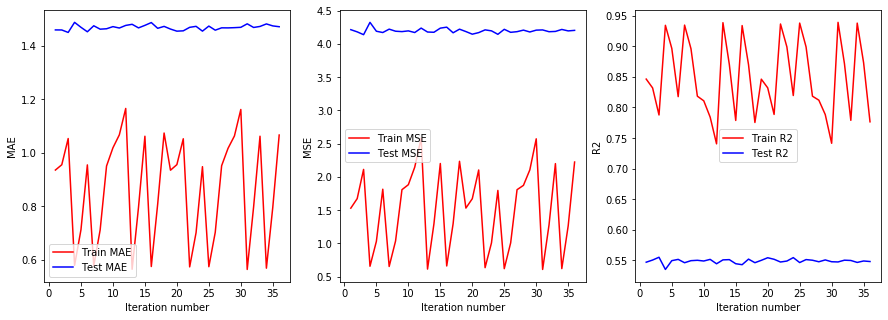

In [18]:
# Lets plot the three performance meterics for Train and test to select best model
plt.rcParams['figure.figsize'] = [15, 5]

# Plot MAE for train and test
plt.subplot(1,3,1)
plt.plot(Performance_RF["Iteration_No"], Performance_RF["Train_MAE"], 'r-', label= "Train MAE")
plt.plot(Performance_RF["Iteration_No"], Performance_RF["Test_MAE"], 'b-', label= "Test MAE")
plt.xlabel("Iteration number")
plt.ylabel("MAE")
plt.legend()

# Plot MSE for train and test
plt.subplot(1,3,2)
plt.plot(Performance_RF["Iteration_No"], Performance_RF["Train_MSE"], 'r-', label= "Train MSE")
plt.plot(Performance_RF["Iteration_No"], Performance_RF["Test_MSE"], 'b-', label= "Test MSE")
plt.xlabel("Iteration number")
plt.ylabel("MSE")
plt.legend()

# Plot r2 for train and test
plt.subplot(1,3,3)
plt.plot(Performance_RF["Iteration_No"], Performance_RF["Train_R2"], 'r-', label= "Train R2")
plt.plot(Performance_RF["Iteration_No"], Performance_RF["Test_R2"], 'b-', label= "Test R2")
plt.xlabel("Iteration number")
plt.ylabel("R2")
plt.legend()
plt.savefig("Manual_trainedRF_Perf.png")
plt.show()

###### Comments:
Based on the plots, hyper-parameter tuning doesn't seem to have any significant affect on random forest regressor results

In [19]:
best_random

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=600, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
# Plot variable Importance of the RF model selected using Grid search
clf = best_random

print("++++++++++++++++++++++++\n")
MAE1, MSE1, r21 = evaluate(best_random, X_train, y_train,'Train Sample')
print("++++++++++++++++++++++++\n")
plt.rcParams['figure.figsize'] = [15, 5]
MAE2, MSE2, r22 = evaluate(best_random, X_test, y_test, 'Test Sample')

++++++++++++++++++++++++

Model Performance:Train Sample
Mean Absolute Error: 1.0054.
Mean Square Error = 1.9748.
Rsquare = 0.8013
++++++++++++++++++++++++

Model Performance:Test Sample
Mean Absolute Error: 1.4682.
Mean Square Error = 4.1519.
Rsquare = 0.5535


In [21]:
def plot_ActvsPred(model, X, y, sample_name):
    plt.rcParams['figure.figsize'] = [10, 5]
    y_hat = model.predict(X)
    y_hat = pd.DataFrame(y_hat)
    y_hat.columns = ["Predicted"]
    y_hat["Actual"] = y
    obs_np = np.arange(0, len(y))
    y_hat = y_hat.sort_values("Actual", ascending=True)
    plt.plot(obs_np, y_hat["Actual"],'r-', label="Actual Age")
    plt.plot(obs_np, y_hat["Predicted"], 'b-', label="Predicted Age")
    plt.xlabel("observation")
    plt.ylabel("Age")
    plt.title("Actual Vs Predicted plot for {} sample".format(sample_name))
    plt.legend()
    plt.savefig(f'RF_{sample_name}_actual_predicted.png')
    plt.plot()
    return

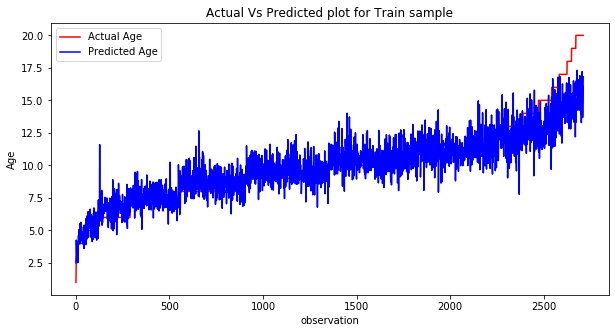

In [22]:
# Plot Actual Versus Predicted for Train Sample
plot_ActvsPred(clf, X_train, y_train, "Train")

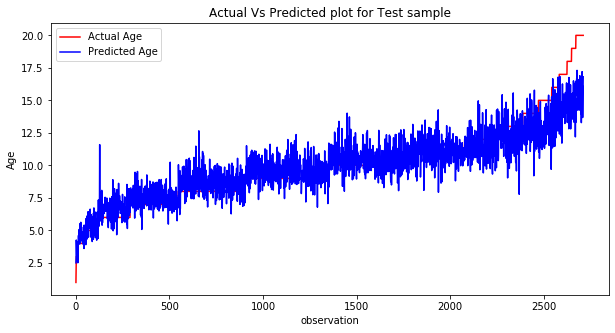

In [23]:
# Plot Actual Versus Predicted for Test Sample
plot_ActvsPred(clf, X_train, y_train, "Test")

###### Comments:
The Random Forest model gives good predictions for most of the age range. It seems to do worse on the lower and upper side of Age variable. This could be due to data capturing error

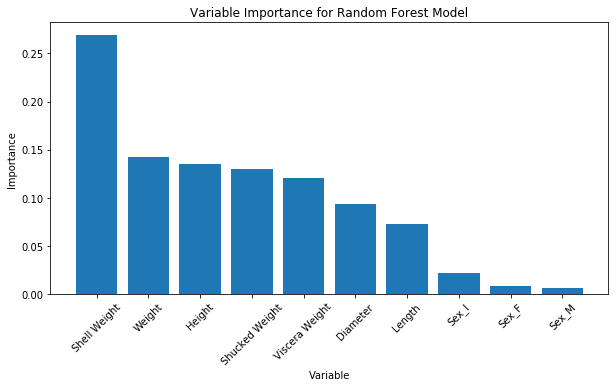

In [24]:
# Plot Variable Importance of the features in the final Model
variable_importance = clf.feature_importances_
variables = list(X_train.columns)
importance = pd.DataFrame(variables)
importance.columns = ["Variables"]
importance["Importance"] = variable_importance
importance = importance.sort_values("Importance", ascending = False)
plt.bar(importance["Variables"], importance["Importance"])
plt.xlabel("Variable")
plt.ylabel("Importance")
plt.title("Variable Importance for Random Forest Model") 
plt.xticks(rotation=45)
plt.savefig('VarImp_RF.png')
plt.show()

###### Comments:
From the independent variables, the shell weight is the maximum driver of age

### Summary:

###### Comparison on Model Performance:

|             Model           | R2 (Train)  | MAE (Train) | MSE (Train) |R2 (Test)  | MAE (Test) | MSE (Test) |
|-----------------------------|:-----------:|:-----------:|:-----------:|:---------:|:----------:|:-----------|
|     Linear Regression       |   0.4180    |    1.7887   |   5.7849    |   0.3825  |   1.7622   |    5.7419  | 
|    Random Forest Regressor  |   0.8013    |    1.0054   |   1.9748    |   0.5535  |   1.4682   |    4.1519  |    

###### Comments:
Based on perfromance metrics $ R^2 $, MAE and MSE for test, the models in order of performance are:

Random Forest Regressor <--- Linear Regression

In [25]:
# Save the RF Model
import pickle

In [26]:
os.chdir('..\\Models\\')
filename = "RF_Regressor.sav"
pickle.dump(best_random, open(filename, 'wb'))